# <center><span style = "color:#0026b0; font-weight: bold"> Very Simple of Regression </span></center>

## 1. Exploratory Data Analysis

In [1]:
# imports needed for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading data
df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
df = df.drop(labels = ['id'], axis = 1)

In [4]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
features_df = df.drop(labels = ['FloodProbability'], axis = 1)
features = features_df.columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


Text(0.5, 1.0, 'Correlation Among Features')

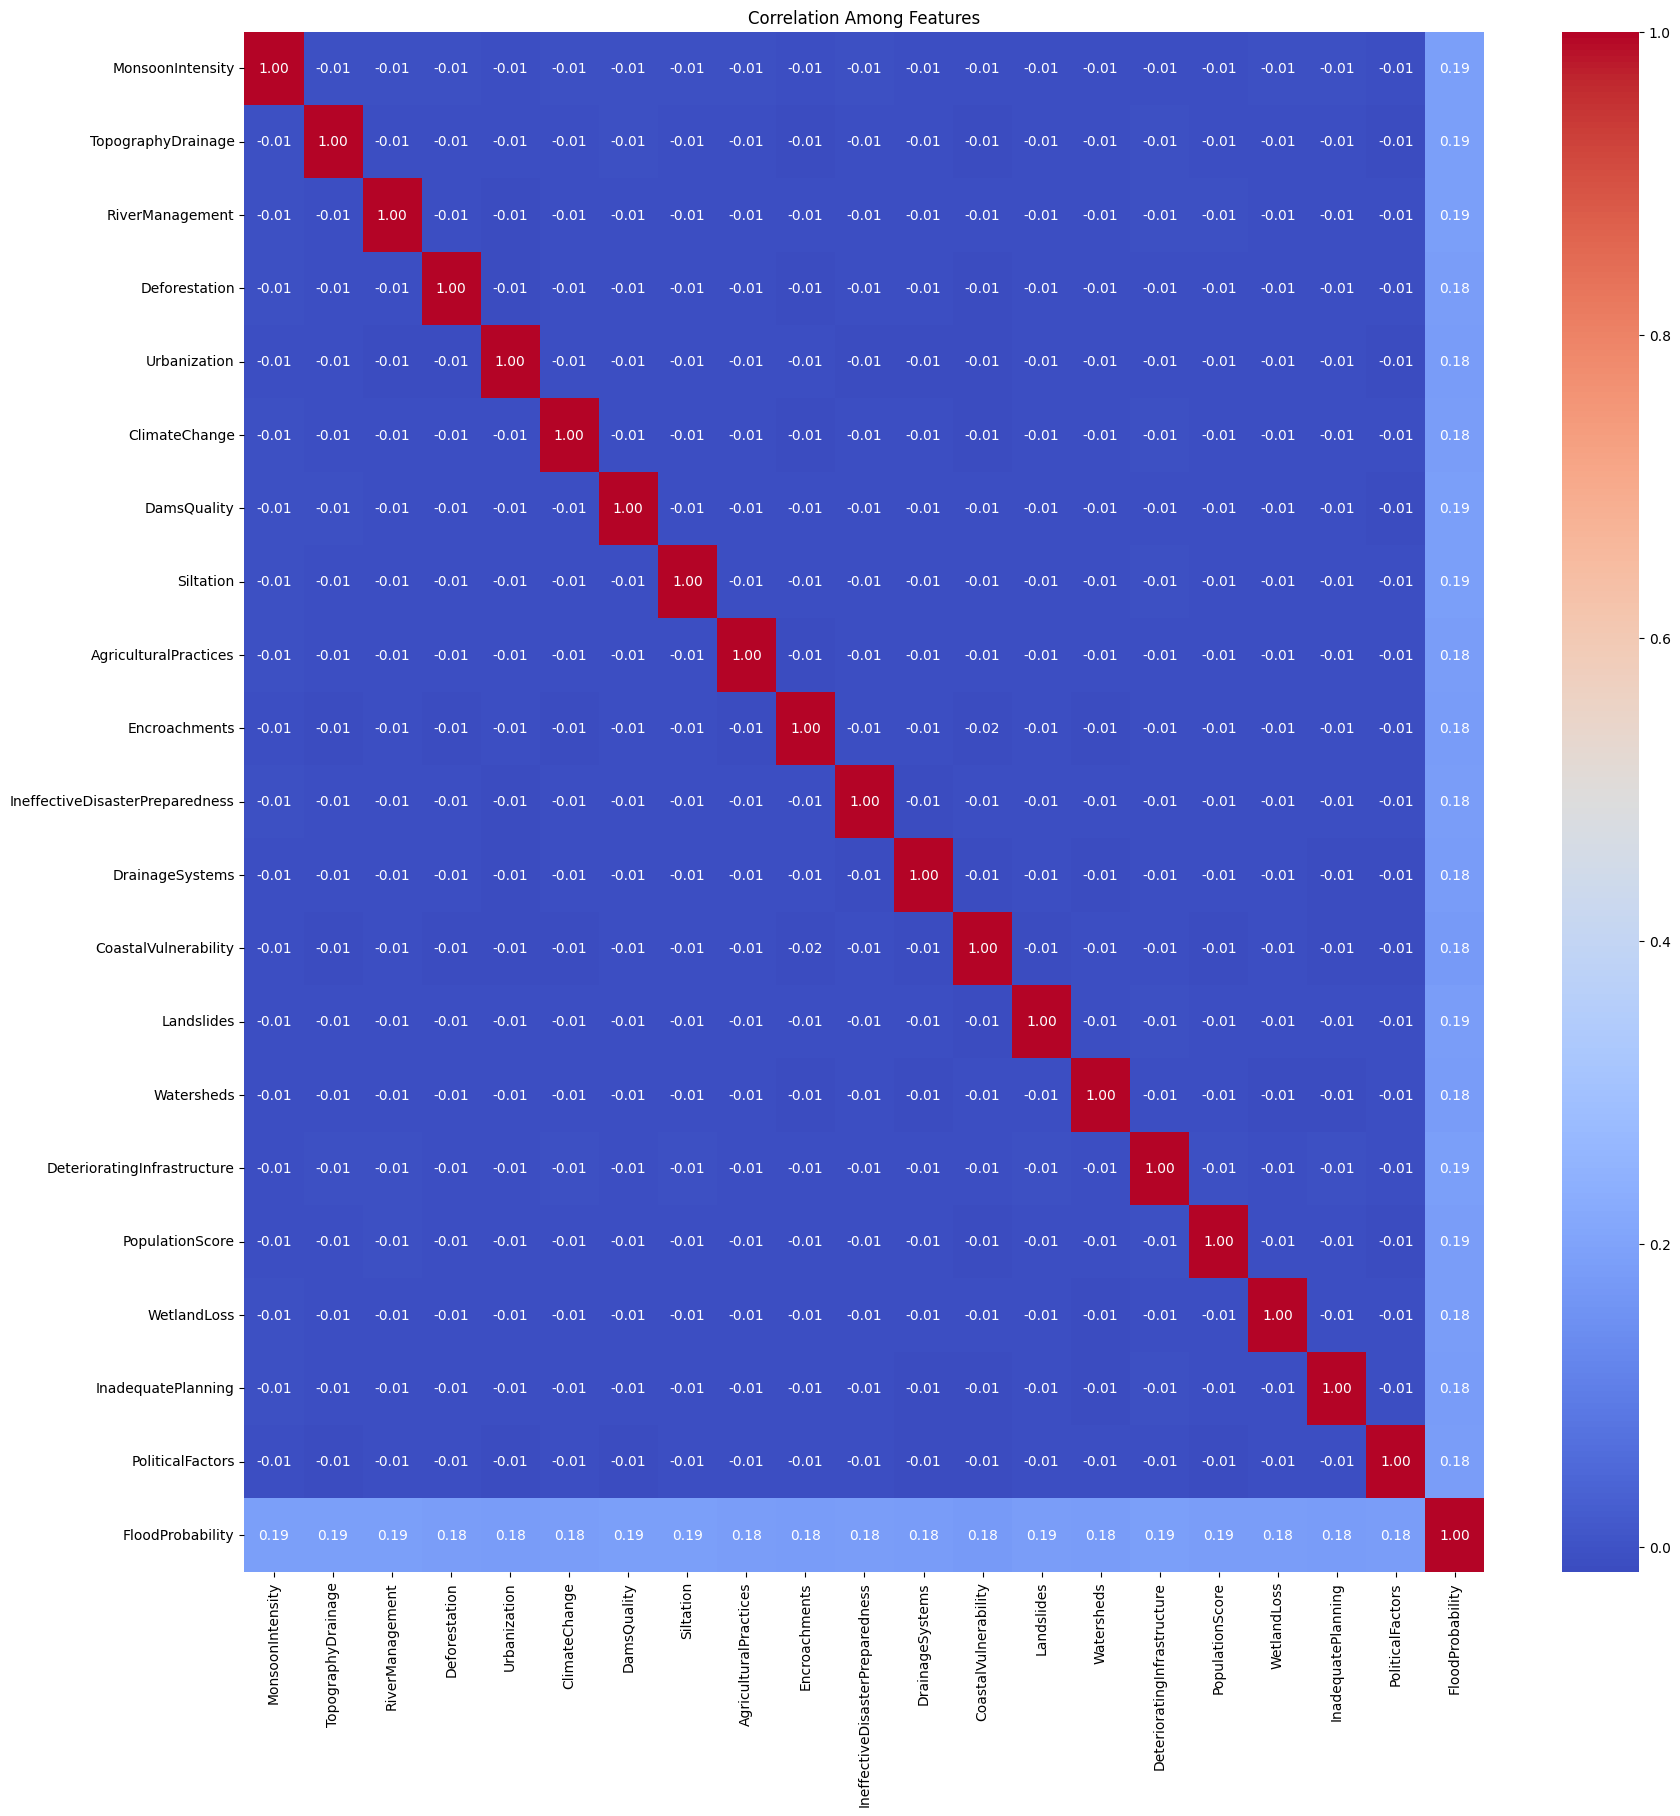

In [8]:
# finding correlation among features
corr_matrix = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Among Features")

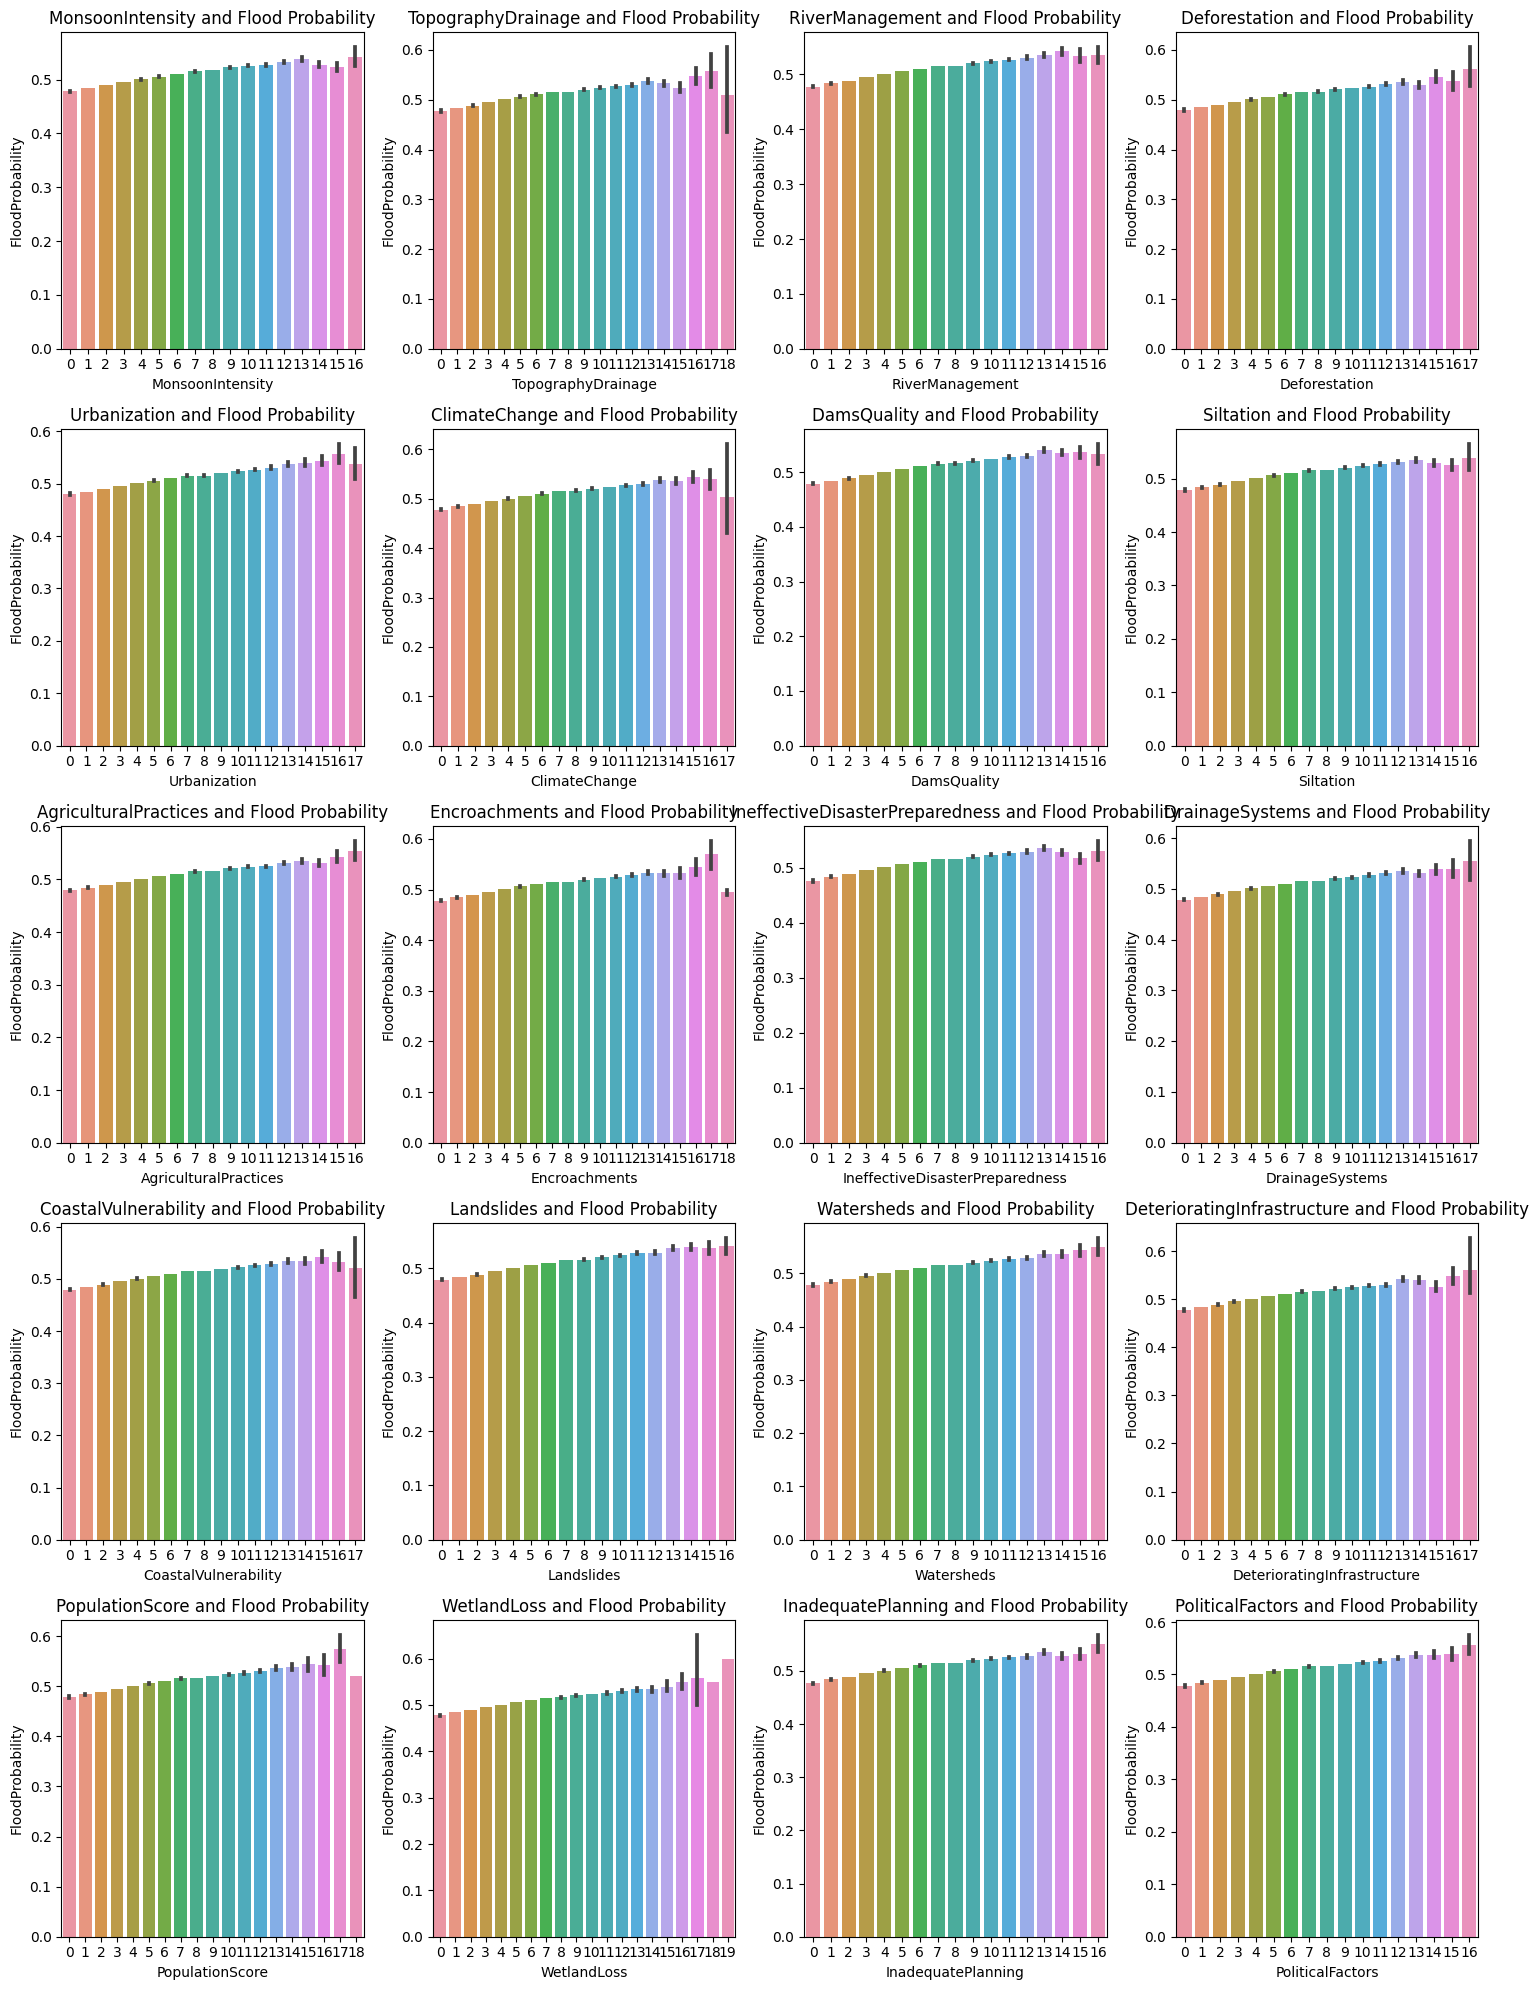

In [9]:
# bar plots to see how features relate to flood probability
fig, axes = plt.subplots(5, 4, figsize = (15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.barplot(x = feature, y = 'FloodProbability', data = df, ax = axes[i])
    axes[i].set_title(f'{feature} and Flood Probability')
plt.tight_layout()
plt.show()

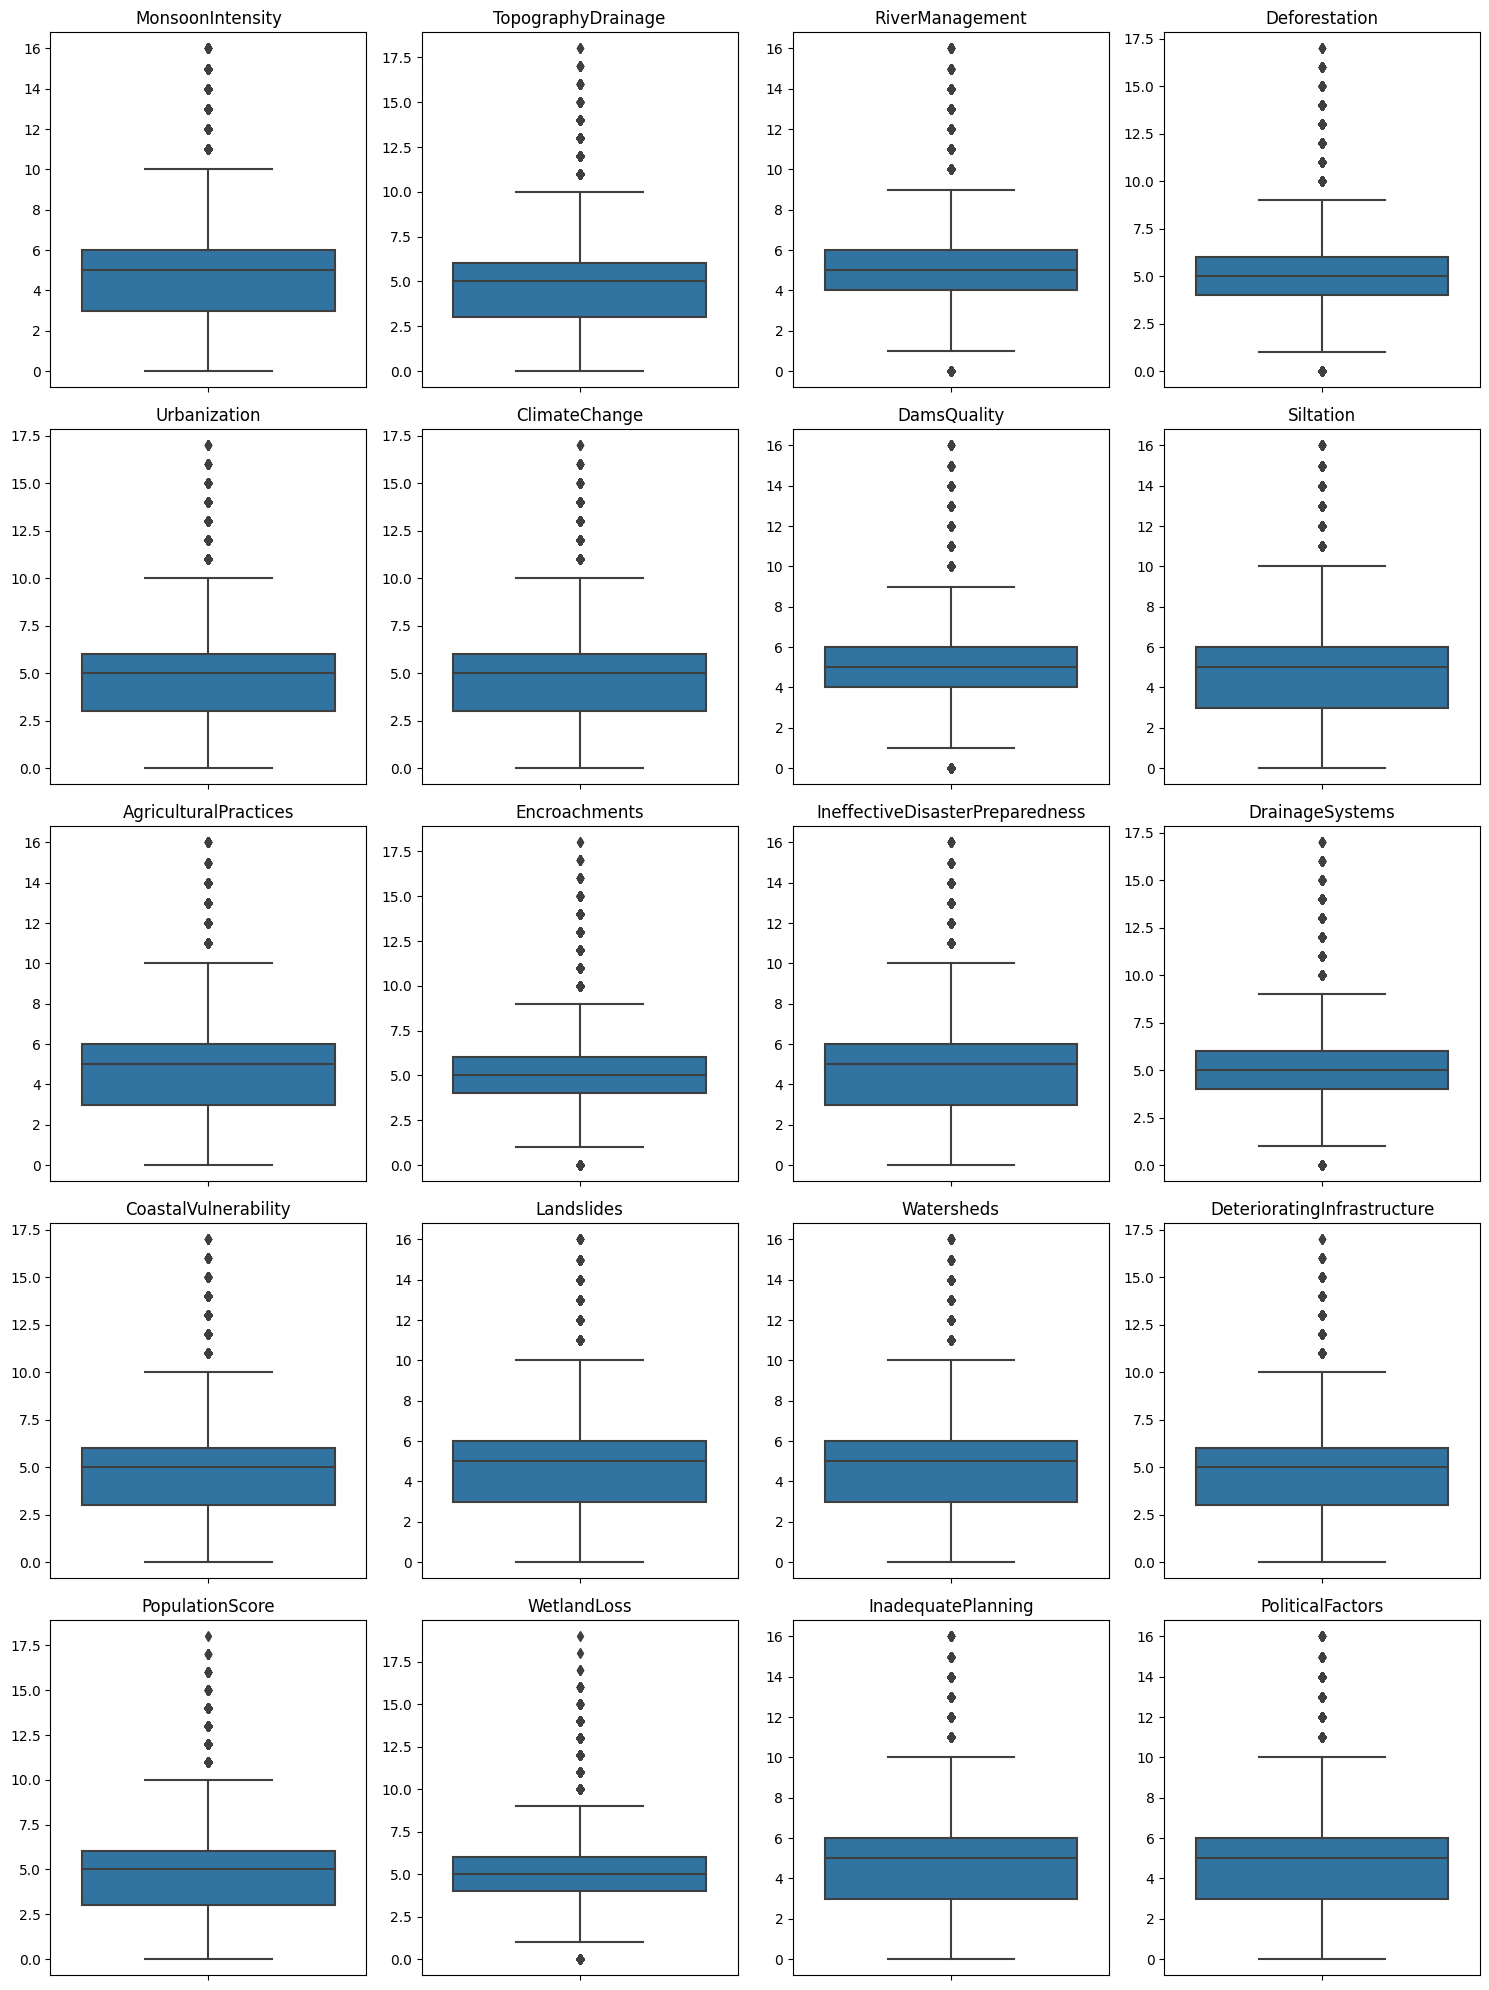

In [10]:
# boxplots to see outliers in feature data
fig, axes = plt.subplots(5, 4, figsize = (15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(y = feature, data = df, ax = axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

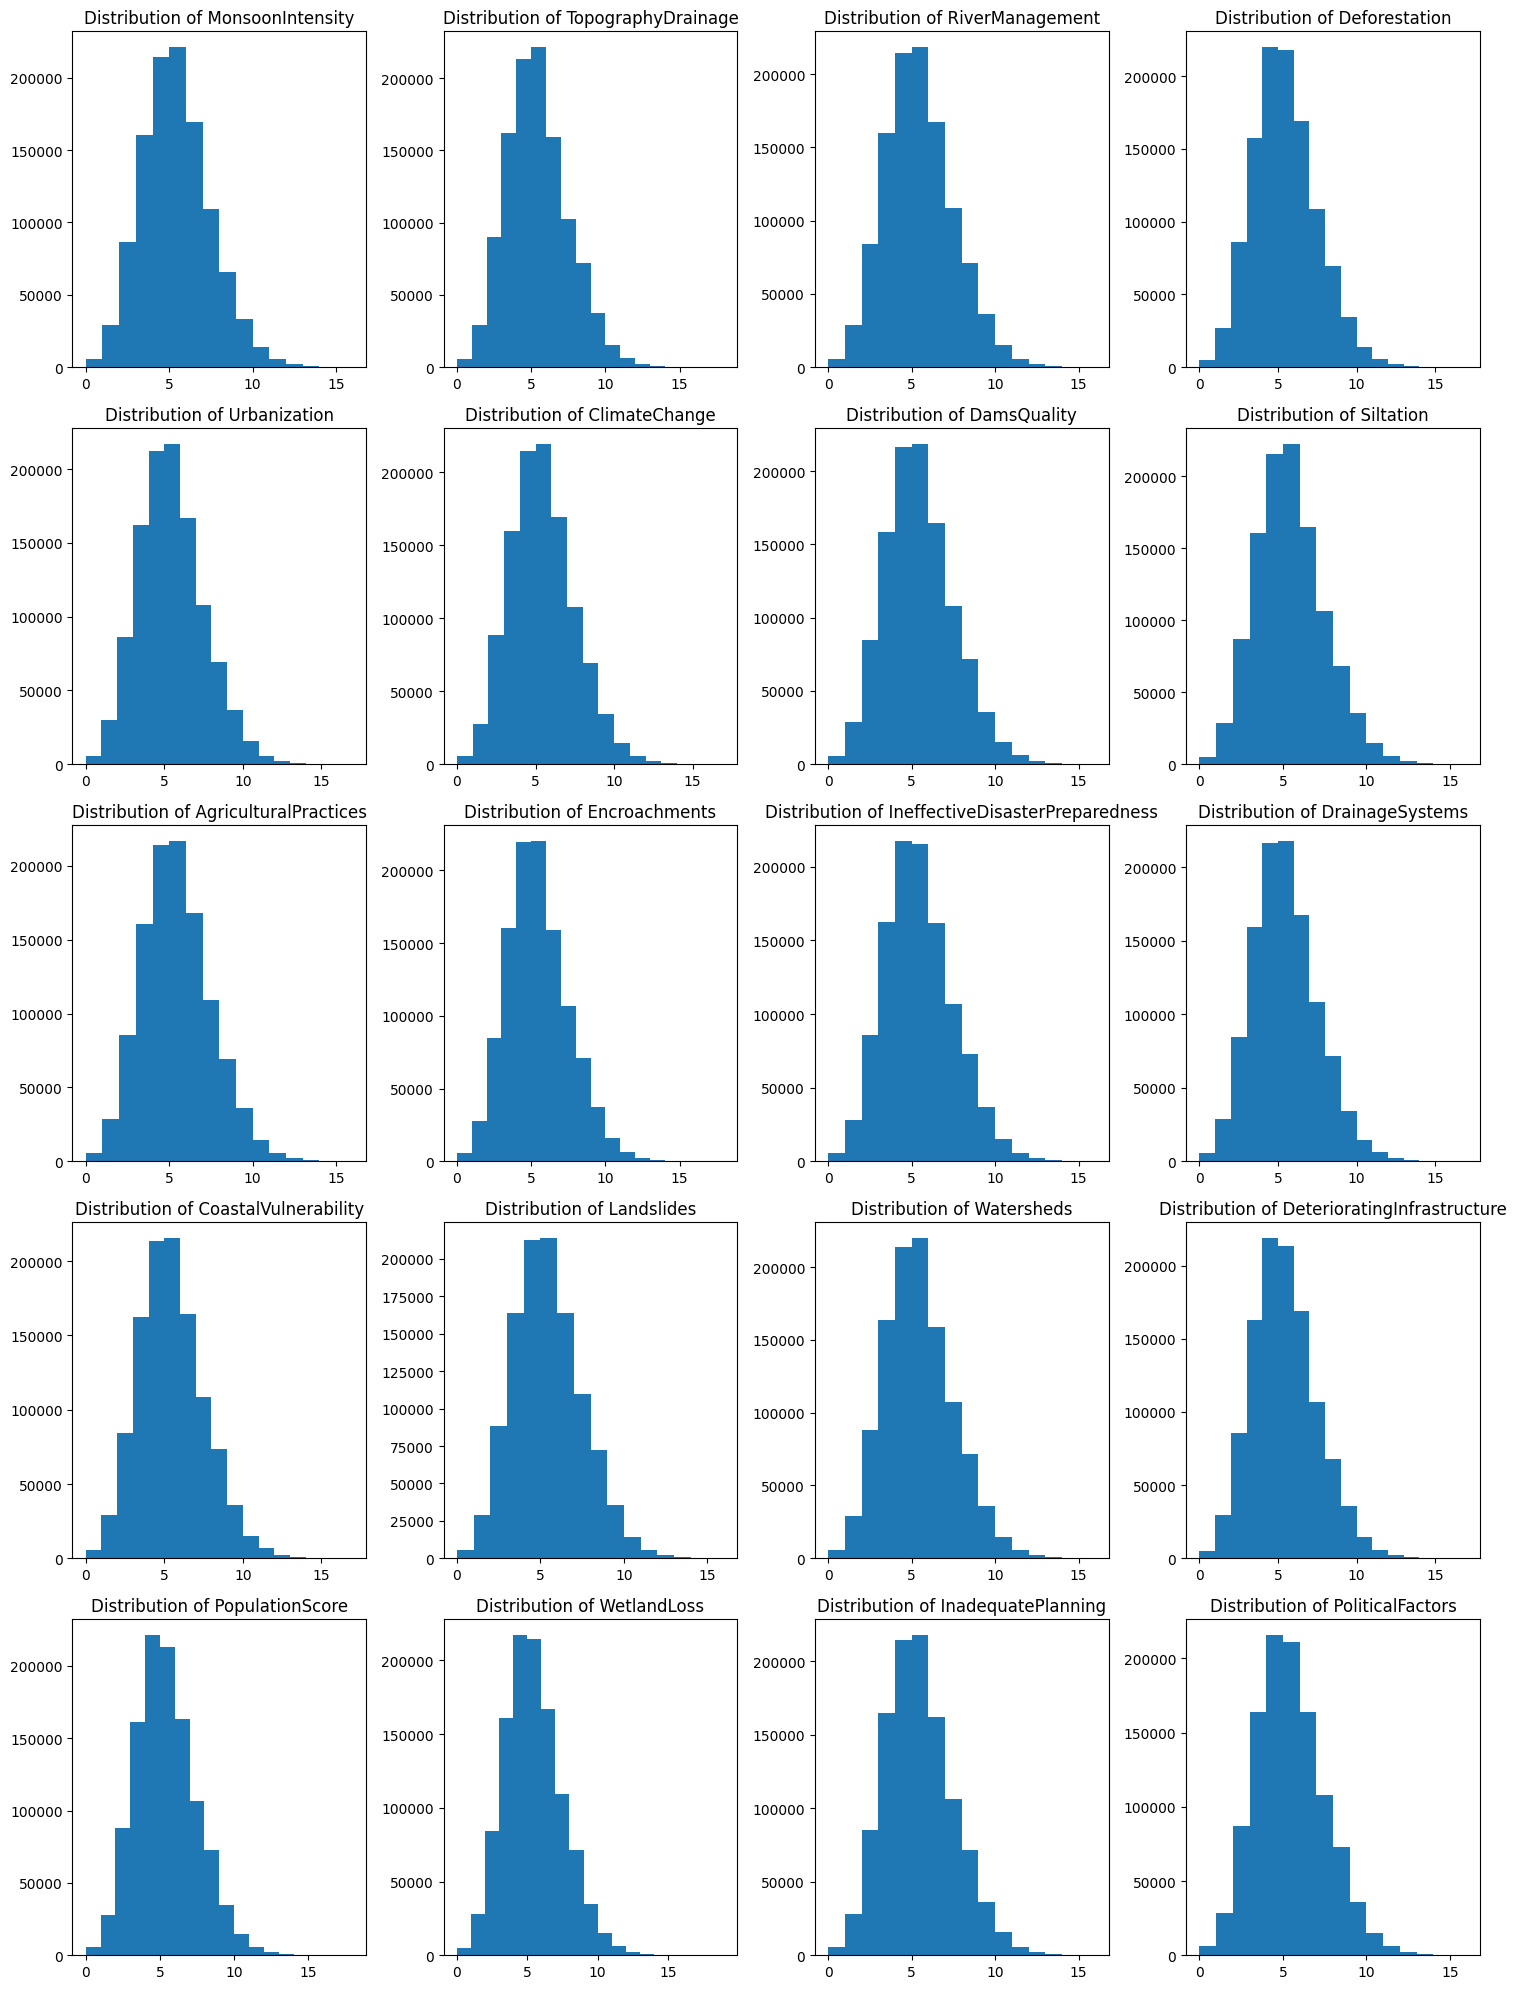

In [11]:
# histograms to see distribution of each feature
fig, axes = plt.subplots(5, 4, figsize = (15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins = max(df[feature]))
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Conclusions from EDA
* Using the heatmap generated from the correlation of features, it can be seen that no two features are correlated with each other. Therefore it can be safe to assume that there is little if any redundancy in the information carried by each individual feature.
* The bar chart roughly explains the relationship between each feature and the predicted Flood Probability. For the most part, it seens like flood probability increases as each feature increases.
* The boxplot and histogram are used to see the distribution of the data and whether or not there are any signficiant outliers. For the most part, the data have similar distributions being centered at about 5 and a fairly limited spread.

## 2. Building the Model

In [12]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
# from eda it was seen that all features useful in some way
X = df.drop(labels = ['FloodProbability'], axis = 1)
y = df['FloodProbability']

In [14]:
# splitting data into val and train
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [15]:
# creating and training model
lr = LinearRegression()

model = lr.fit(X_train, y_train)

In [16]:
print('Train R2 Score:')
print(lr.score(X_train, y_train))
print('Validation R2 Score:')
print(lr.score(X_val, y_val))

Train R2 Score:
0.8447680294077697
Validation R2 Score:
0.8456734198579887


## 3. Submission

In [17]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
X_test = test_df[features]
y_pred_test = lr.predict(X_test)

In [18]:
submission = pd.DataFrame({'id': test_df['id'], 'FloodProbability':y_pred_test})
submission.to_csv('submission.csv', index = False)

## Things to Add on Later
1. Feature Engineering
2. Cross Validation?
3. Trying different models such as decision tree regressors and ensemble methods